##Read the dataset

In [32]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/dataset-merged-NONULL-final.csv')

print(data)

        company                                              title  \
0           IBM  IBM and NASA open source the largest geospatia...   
1          Meta  In Canada, Meta Begins Blocking News on Facebo...   
2     Microsoft  Midnight Blizzard conducts targeted social eng...   
3           IBM  IBM and NASA Open Source Largest Geospatial AI...   
4           IBM  NASA and IBM Openly Release Geospatial AI Foun...   
...         ...                                                ...   
2949     Costco  Costco is selling apocalypse-ready meal bucket...   
2950   Broadcom  OpenAI turns to Broadcom as Musk, Zuckerberg s...   
2951   American  Cardmember spending drives American Express se...   
2952   Broadcom  OpenAI in talks with Broadcom to develop custo...   
2953    Tencent  Crypto Trading Firm Wintermute in Talks to Rai...   

                    source   label_x zero_shot_label        Date   ticker  \
0             IBM Research  POSITIVE          social  2023-08-02      IBM   
1    

In [33]:
data.columns

Index(['company', 'title', 'source', 'label_x', 'zero_shot_label', 'Date',
       'ticker', 'environmentScore', 'socialScore', 'governanceScore', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Company Name',
       'ESG Rating', 'environment_negative_percentage',
       'government_negative_percentage', 'neutral_negative_percentage',
       'social_negative_percentage', 'environment_positive_percentage',
       'government_positive_percentage', 'neutral_positive_percentage',
       'social_positive_percentage'],
      dtype='object')

##3.1 Model - XGBoost
Prediction of g_index

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb

# Feature scaling
scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Define features and target
X = data.drop(columns=['Date', 'environmentScore', 'socialScore', 'governanceScore', 'company', 'Adj Close', 'Volume', 'label_x', 'zero_shot_label', 'title', 'source', 'ESG Rating', 'Ticker', 'ticker', 'Company Name'])
y = data['governanceScore']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the e_score for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.22192419954161155
Mean Squared Error (MSE): 0.1732534770454703
Root Mean Squared Error (RMSE): 0.4162372845450901


<Figure size 1000x1000 with 0 Axes>

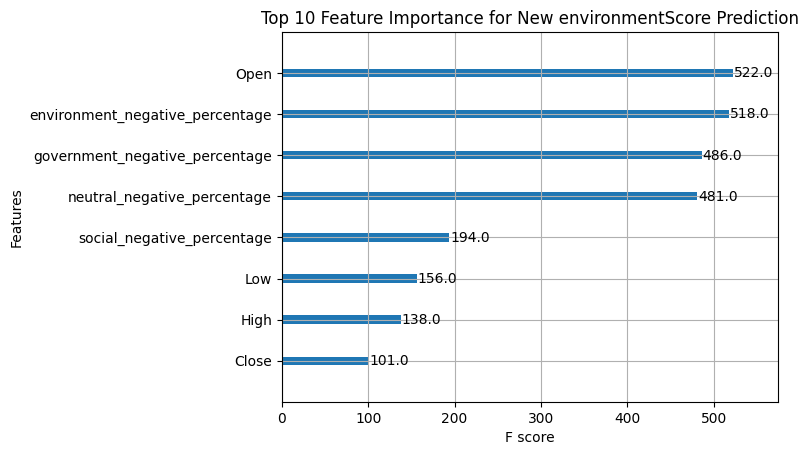

In [36]:
import matplotlib.pyplot as plt

# Feature importance for the new environmentScore model
plt.figure(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=10, importance_type='weight')
plt.title('Top 10 Feature Importance for New environmentScore Prediction')
plt.show()

##3.2 Model - XGBoost
Prediction of e_index

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb

# Feature scaling
scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Define features and target
X = data.drop(columns=['Date', 'environmentScore', 'socialScore', 'governanceScore', 'company', 'Adj Close', 'Volume', 'label_x', 'zero_shot_label', 'title', 'source', 'ESG Rating', 'Ticker', 'ticker', 'Company Name'])
y = data['environmentScore']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the e_score for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.26736515442858094
Mean Squared Error (MSE): 0.32157815534496637
Root Mean Squared Error (RMSE): 0.5670786147836703


<Figure size 1000x1000 with 0 Axes>

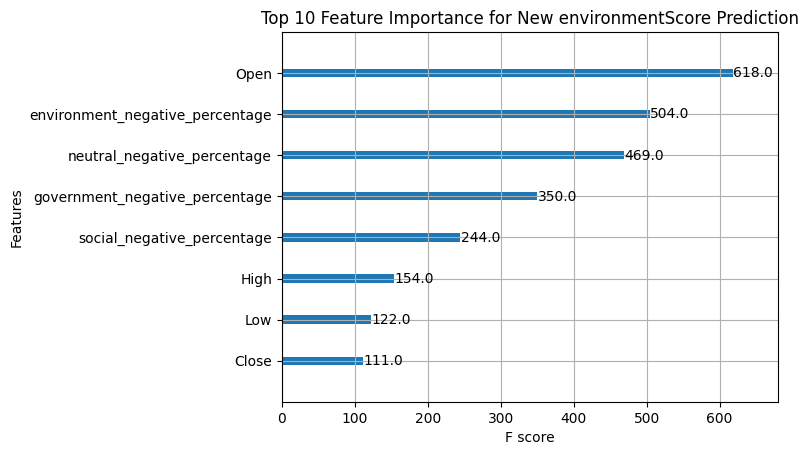

In [39]:
import matplotlib.pyplot as plt

# Feature importance for the new environmentScore model
plt.figure(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=10, importance_type='weight')
plt.title('Top 10 Feature Importance for New environmentScore Prediction')
plt.show()

##3.3 Model - XGBoost
Prediction of s_index

Mean Absolute Error (MAE): 0.3631564161136066
Mean Squared Error (MSE): 0.7223848800605897
Root Mean Squared Error (RMSE): 0.8499322796909115


<Figure size 1000x600 with 0 Axes>

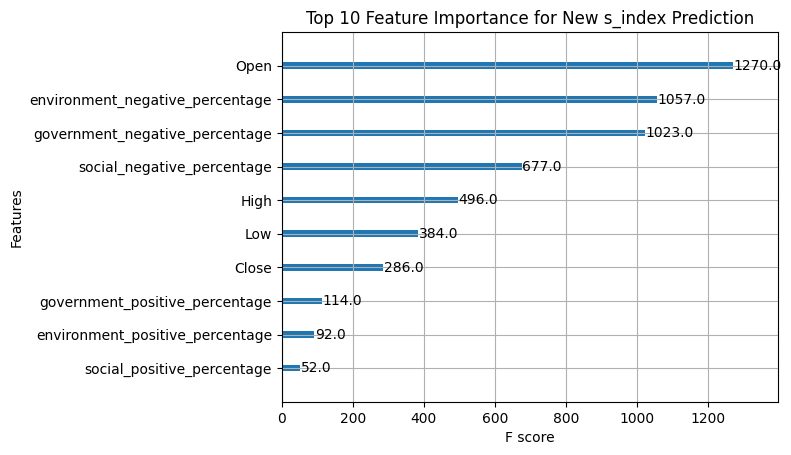

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Define features and target
X = data.drop(columns=['Date', 'environmentScore', 'socialScore', 'governanceScore', 'company', 'Adj Close', 'Volume', 'label_x', 'zero_shot_label', 'title', 'source', 'ESG Rating', 'Ticker', 'ticker', 'Company Name', 'neutral_positive_percentage', 'neutral_negative_percentage'])
y = data['socialScore']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model with different parameters
model_s_new = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    min_child_weight=1,      # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.9,           # Fraction of samples used for fitting each tree
    colsample_bytree=0.9,    # Fraction of features used for fitting each tree
    gamma=0.1,               # Regularization term
    random_state=42
)
model_s_new.fit(X_train, y_train)

# Predict the s_index for the test set
y_pred_s_new = model_s_new.predict(X_test)

# Calculate evaluation metrics
mae_s_new = mean_absolute_error(y_test, y_pred_s_new)
mse_s_new = mean_squared_error(y_test, y_pred_s_new)
rmse_s_new = np.sqrt(mse_s_new)

print(f"Mean Absolute Error (MAE): {mae_s_new}")
print(f"Mean Squared Error (MSE): {mse_s_new}")
print(f"Root Mean Squared Error (RMSE): {rmse_s_new}")

# Feature importance for the new s_index model
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_s_new, max_num_features=10, importance_type='weight')
plt.title('Top 10 Feature Importance for New s_index Prediction')
plt.show()

In [41]:
X['social_positive_percentage'].unique()

array([100.        ,   0.        ,  57.89473684,  75.        ,
        55.55555556,  55.48245614,  87.5       ,  55.95238095,
        66.12903226,  90.625     ,  58.        ,  66.08187135,
        78.57142857,  60.83743842,  51.72413793,  51.875     ,
        73.91304348,  59.84848485,  68.05555556,  48.98989899,
        50.        ,  33.87096774,  67.33333333,  34.61538462,
        43.07359307,  33.33333333,  77.        ,  56.42076503,
        29.65116279,  66.06060606,  80.        ,  38.67924528,
        64.25438596,  26.58227848,  66.66666667,  50.29411765,
        48.71794872,  59.        ,  55.55555556,  71.25506073,
        25.        ,  39.28571429,  44.59459459,  71.42857143,
        12.5       ,  43.31232493,  40.        ,  20.        ,
        16.66666667,  88.46153846,  83.33333333,  28.57142857])

With only social news sentiment

Mean Absolute Error (MAE): 1.4954435738210146
Mean Squared Error (MSE): 6.526717187822044
Root Mean Squared Error (RMSE): 2.554744055247422


<Figure size 1000x600 with 0 Axes>

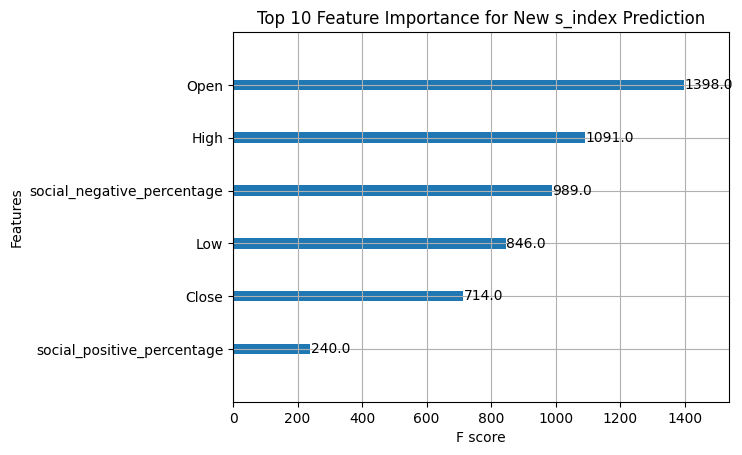

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Define features and target
X = data.drop(columns=['Date', 'environmentScore', 'socialScore', 'governanceScore', 'company', 'Adj Close', 'Volume', 'label_x', 'zero_shot_label', 'title', 'source', 'ESG Rating', 'Ticker', 'ticker', 'Company Name', 'neutral_positive_percentage', 'neutral_negative_percentage', 'government_positive_percentage', 'government_negative_percentage', 'environment_positive_percentage', 'environment_negative_percentage'])
y = data['socialScore']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model with different parameters
model_s_new = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    min_child_weight=1,      # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.9,           # Fraction of samples used for fitting each tree
    colsample_bytree=0.9,    # Fraction of features used for fitting each tree
    gamma=0.1,               # Regularization term
    random_state=42
)
model_s_new.fit(X_train, y_train)

# Predict the s_index for the test set
y_pred_s_new = model_s_new.predict(X_test)

# Calculate evaluation metrics
mae_s_new = mean_absolute_error(y_test, y_pred_s_new)
mse_s_new = mean_squared_error(y_test, y_pred_s_new)
rmse_s_new = np.sqrt(mse_s_new)

print(f"Mean Absolute Error (MAE): {mae_s_new}")
print(f"Mean Squared Error (MSE): {mse_s_new}")
print(f"Root Mean Squared Error (RMSE): {rmse_s_new}")

# Feature importance for the new s_index model
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_s_new, max_num_features=10, importance_type='weight')
plt.title('Top 10 Feature Importance for New s_index Prediction')
plt.show()